<h1 style="font-size:60px; color:White; background:#0BCD94">Logistic Regression </h1>
<br>

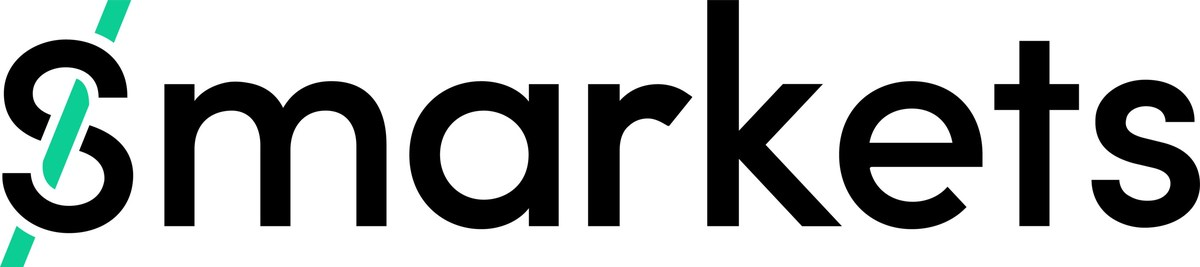

<p style=" font-size:40px;  color:Black;">Motahare Shokri</p>

<p style=" font-size:30px;  color:Black;">Data Scientist</p>ِ

 <p style=" font-size:20px; color:Black;">ِ Last release:  10/3/2023 </p>

[linkedin](https://www.linkedin.com/in/motahare-shokri/)
[github](https://github.com/motishokri)

## Data description

The `Smarket` dataset , this data showcases the S&P 500 stock idnex for 1250 days (observations) on the following 9 variables. This data is from 2001 to 2005. For each date the percentage returns on the previous 5 days Lag1-Lag5 have been recorded as follows.

> |Variable| Description| 
 |:-------------|:-------------|
 |Year   | <b>The year that the observation was recorded|
 |Lag1    | <b>Percentage return for previous day|
 |Lag2    | <b>Percentage return for 2 days previous|
 |Lag3    | <b>Percentage return for 3 days previous|
 |Lag4     | <b>Percentage return for 4 days previous|
 |Lag5   | <b>Percentage return for 5 days previous|
 |Volume   | <b>Volume of shares traded (number of daily shares traded in billions)|
 |Today   | <b>Percentage return for today|
 |Direction   | <b>A factor with levels Down and Up indicating whether the market had a positive or negative return on a given day|

# Step 1: Preprocessing


## Read data

In [62]:
#Required Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Train & Test
from sklearn.model_selection import train_test_split

#Fit LogisticRegression
from sklearn.linear_model import LogisticRegression

#Accuracy Metrics

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [63]:
Smarket = pd.read_csv("/kaggle/input/smarket/Smarket.csv")

In [64]:
Smarket.shape

(1250, 9)

In [65]:
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [66]:
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


**To know more about the dataset:**

In [67]:
Smarket.describe().T 

,count,mean,std,min,25%,50%,75%,max
Year,1250.0,2003.016000,1.409018,2001.00000,2002.0000,2003.00000,2004.000000,2005.00000
Lag1,1250.0,0.003834,1.136299,-4.92200,-0.6395,0.03900,0.596750,5.73300
Lag2,1250.0,0.003919,1.136280,-4.92200,-0.6395,0.03900,0.596750,5.73300
Lag3,1250.0,0.001716,1.138703,-4.92200,-0.6400,0.03850,0.596750,5.73300
Lag4,1250.0,0.001636,1.138774,-4.92200,-0.6400,0.03850,0.596750,5.73300
Lag5,1250.0,0.005610,1.147550,-4.92200,-0.6400,0.03850,0.597000,5.73300
Volume,1250.0,1.478305,0.360357,0.35607,1.2574,1.42295,1.641675,3.15247
Today,1250.0,0.003138,1.136334,-4.92200,-0.6395,0.03850,0.596750,5.73300


In [68]:
Smarket.drop(['Year','Direction'], inplace=True, axis=1)

In [69]:
Smarket.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
0,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959
1,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032
2,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623
3,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614
4,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213


## Check for null entries

In [70]:
print("Number of null values in the data set are - ",Smarket.isnull().values.any().sum())

Number of null values in the data set are -  0


## Deal with the outliers

### Definition IQR function

In [71]:
#function for calculate the IQR criterion
def iqr_func(data):
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    return iqr

In [72]:
#function for detect outliers in data, base on IQR criterion
def outlier_func(data):
    outlier = []
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    for i in data :
        if (i > (q3 + 1.5 * iqr) or i < (q1 - 1.5 * iqr)):
            outlier.append(True)
        else:
            outlier.append(False)
    return outlier

### Remove outliers

In [73]:
column_names = list(Smarket.columns)
Smarket_out   = pd.DataFrame()
for name in column_names:
    Smarket_out[name] = outlier_func(Smarket[name])

In [74]:
Smarket_out

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
0,False,False,True,False,True,False,False
1,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1245,False,False,False,False,False,False,False
1246,False,False,False,False,False,False,False
1247,False,False,False,False,False,False,False
1248,False,False,False,False,False,False,False


In [75]:
Smarket_colsum = Smarket_out.sum()
Smarket_colsum

Lag1      45
Lag2      45
Lag3      46
Lag4      46
Lag5      47
Volume    66
Today     45
dtype: int64

**In each column, we summed up the total number of outliers. The highest number of outliers is associated with the "volume" column.**

In [76]:
Smarket_rowsum = Smarket_out.sum(axis = 1)
Smarket_rowsum

0       2
1       1
2       1
3       0
4       0
       ..
1245    0
1246    0
1247    0
1248    0
1249    0
Length: 1250, dtype: int64

**In each record, we summed up the total number of outliers because our intention is to remove records that have more than the usual (3 or more) outlier data points.**

In [77]:
list(Smarket_rowsum[Smarket_rowsum  == 3].index)

[62, 386, 390, 391, 392, 394, 395, 430, 431, 438, 439, 442, 544]

**It returns a list of index numbers for records that have more than 3 outlier data points.**

In [78]:
Smarket = pd.read_csv('/kaggle/input/smarket/Smarket.csv')

In [79]:
n_otlier_feature = 3
for j in range(len(Smarket)):
    if Smarket_rowsum[j] >= n_otlier_feature:
        Smarket = Smarket.drop(j)

In [80]:
Smarket.head(3)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down


In [81]:
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1227 non-null   int64  
 1   Lag1       1227 non-null   float64
 2   Lag2       1227 non-null   float64
 3   Lag3       1227 non-null   float64
 4   Lag4       1227 non-null   float64
 5   Lag5       1227 non-null   float64
 6   Volume     1227 non-null   float64
 7   Today      1227 non-null   float64
 8   Direction  1227 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 95.9+ KB


**Out of the total of 1250 records in the dataset, after removing records with more than 3 outlier data points, the total number of records decreased to 1227. This means that 23 records were removed.**

### Box Plot

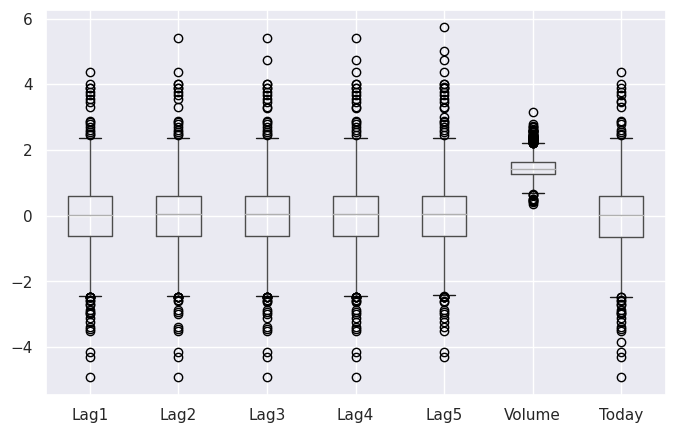

In [82]:
fig = plt.figure(figsize =(8, 5))
boxplot = Smarket.iloc[:, 1:8].boxplot(column = list(Smarket.iloc[:, 1:8].columns))

**Almost all the data is normal, especially the logs and volume, which are somewhat normal with a slight skewness. This is because they have relatively lower variance, and their distribution is appropriate since volume follows the equation.**

## Corrlation

In [83]:
corrMatrix = Smarket.iloc[:, 1:8].corr()
corrMatrix

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000,-0.060711,-0.024090,-0.003547,0.042822,0.035360,-0.036060
Lag2,-0.060711,1.000000,-0.048953,-0.031618,0.010099,-0.024406,-0.025300
Lag3,-0.024090,-0.048953,1.000000,-0.037845,-0.009200,-0.018435,-0.016089
Lag4,-0.003547,-0.031618,-0.037845,1.000000,-0.048028,-0.031550,0.034874
Lag5,0.042822,0.010099,-0.009200,-0.048028,1.000000,0.009821,0.014513
Volume,0.035360,-0.024406,-0.018435,-0.031550,0.009821,1.000000,0.004360
Today,-0.036060,-0.025300,-0.016089,0.034874,0.014513,0.004360,1.000000


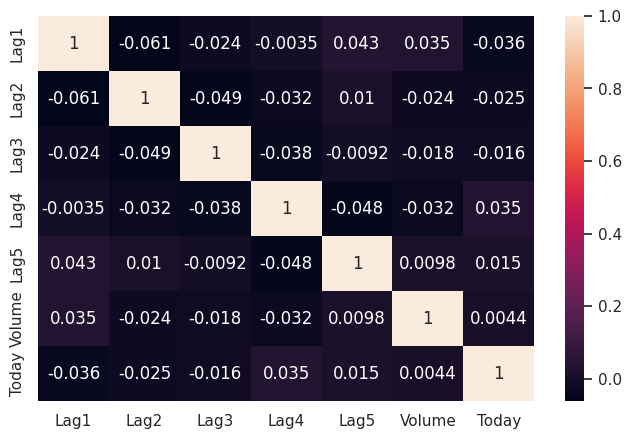

In [84]:
fig = plt.figure(figsize =(8, 5))
sns.heatmap(corrMatrix, annot=True)
plt.show()

**In the main diagonal of the plot, except for volume, the remaining variables have a normal distribution. Other variables do not exhibit any specific patterns.**

# Step 2: Logistic Regression

Based on the number of categories, logistic regression can be used for classification.

In this context, the response or target variable can have only two possible values: "0" or "1," which in this problem represent "positive returns" versus "negative returns." To achieve this, sigmoid functions are used.

In the logistic regression model, assuming we consider the predictor variable Lag1 and the response variable Direction, we can write the following formula for the logistic regression model:


$$ log(odds(Direction)) = \beta_0 + \beta_1 Lag1 $$

<span style='font-family:XB Niloofar; font-size:16px'>

Here:

- **log(odds(Direction))** represents the logarithm of the odds ratio for the market's directional movement (Direction).

- **β₀** represents the intercept coefficient in the logistic regression model.

- **β₁** represents the slope coefficient for the Lag1 predictor variable.

In this context, β₀, β₁, and the other parameters are the coefficients or parameters of the Logistic Regression model, estimated through methods like Maximum Likelihood Estimation (MLE) or other estimation techniques during model training. This formula can be used to predict the probability of the Direction outcome for a new dataset. 

By fitting the Logistic Regression model to observed data, we can estimate the values of β₀ and β₁. Using these coefficients, we can predict the probabilities of market movement direction based on Lag1 values for new data points.

<!-- فرمول رگرسیون لجستیک (Logistic Regression) برای پیش‌بینی متغیر پاسخ "Direction" بر اساس متغیر پیش‌بین "Lag1" به صورت زیر است:

P(Direction = Up | Lag1) = 1 / (1 + exp(-z))

در اینجا:
- P(Direction = Up | Lag1) نشان دهنده احتمال این است که متغیر پاسخ "Direction" برابر با "Up" باشد به شرط داشتن مقدار متغیر پیش‌بین "Lag1".
- z نشانگر تابع خطی است که بر اساس متغیر پیش‌بین و ضرایب مدل محاسبه می‌شود. فرمول آن به صورت زیر است:
   z = β₀ + β₁ * Lag1

در اینجا:
- β₀ و β₁ ضرایب مدل هستند که توسط الگوریتم رگرسیون لجستیک تخمین زده می‌شوند و نشان دهنده تأثیر متغیر پیش‌بین "Lag1" بر احتمال پاسخ "Direction" است.

برای استفاده از مدل رگرسیون لجستیک، ابتدا ضرایب β₀ و β₁ باید به‌وسیله‌ی روش‌هایی مانند روش حداقل مربعات تعیین شوند. سپس با استفاده از مقادیر متغیر پیش‌بین "Lag1"، احتمال رخداد پاسخ "Direction" را محاسبه می‌کنیم. -->

## Train and Test Split

In [85]:
data_train, data_test = train_test_split(Smarket, test_size=0.20, random_state=42)

In [86]:
Direction_count = Smarket['Direction'].value_counts()

Text(0, 0.5, 'Number Of Occurrences')

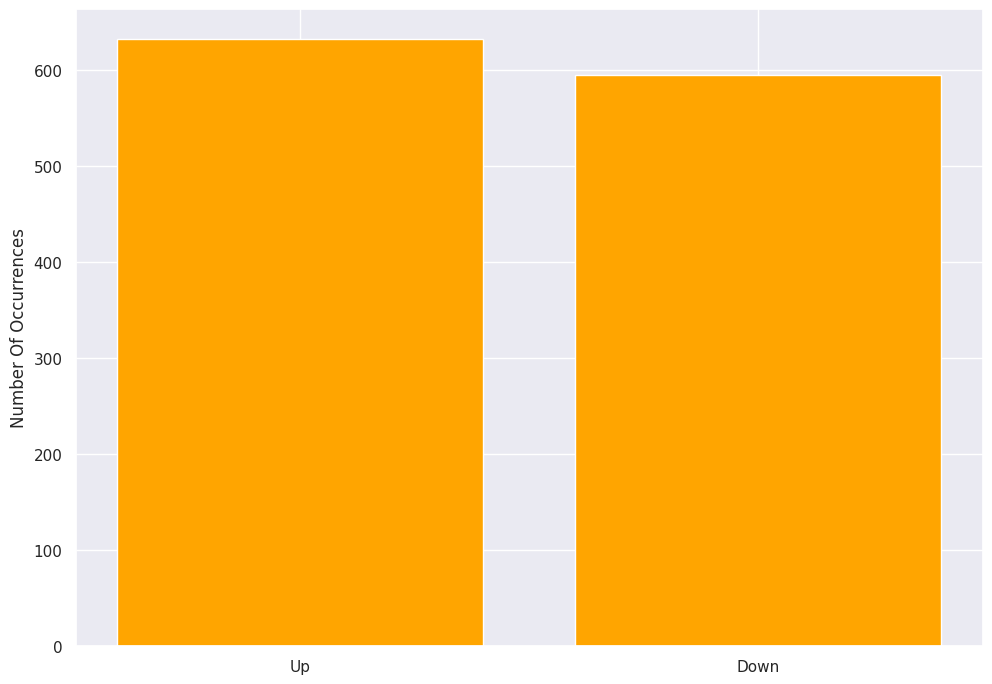

In [87]:
plt.bar(list(Direction_count.index), list(Direction_count.values) , color = 'orange' ,  width=0.8)
plt.ylabel('Number Of Occurrences', fontsize=12)

**After training and testing, it is preferable for the values of Up and Down to be fairly close to each other.**

In [88]:
x_train = np.array(data_train["Lag1"]).reshape((-1, 1))
y_train = np.array(data_train["Direction"])

## Fitting Logistic Regression to the Training set

After preprocessing and preparing the dataset, in this stage, we will train it using the training set. To perform model training or fitting on the training set, we import the `LogisticRegression` class from the sklearn library.

In [89]:
model1_classifier = LogisticRegression()
model1_classifier.fit(x_train,y_train)

LogisticRegression()

In [90]:
r_sq = model1_classifier.score(x_train , y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.5219164118246687


**By using a single predictor variable, Lag1, our model achieved an approximate accuracy of 52 percent.**

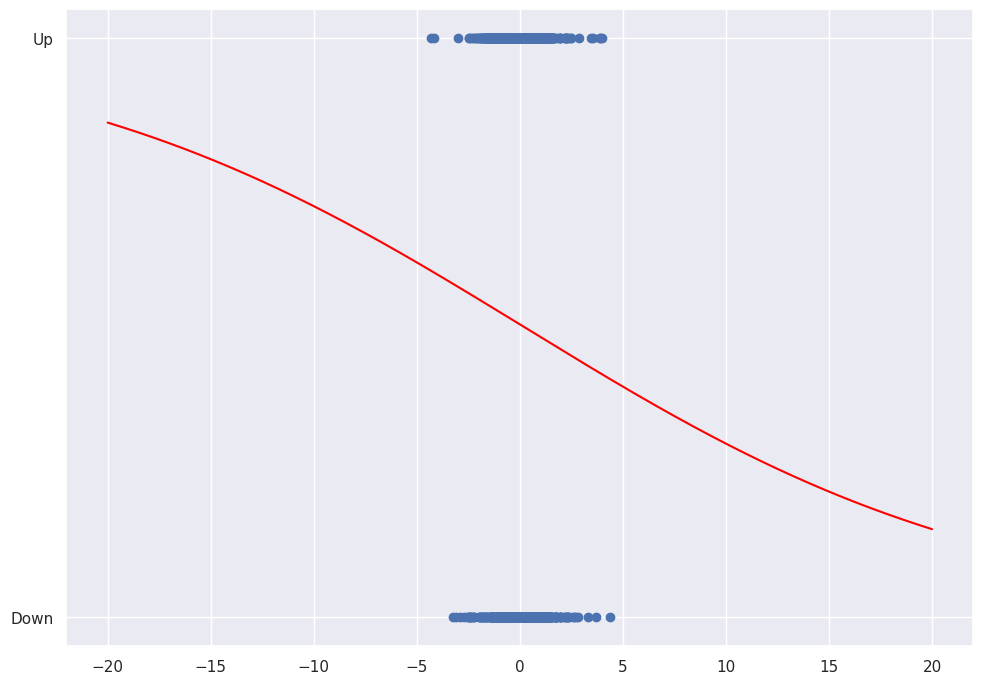

In [92]:
Xs = np.arange(-20, 20, .01).tolist()
Ys = [model1_classifier.predict_proba([[value]])[0][1] for value in Xs]

plt.scatter(data_train['Lag1'], data_train['Direction'])
plt.plot(Xs, Ys, color='red')

**The shape of my model looks like this, and it seems to be quite erratic. It's making roughly 50-50 predictions, which means the model is not performing well and is not a strong predictor.**

## Train and Test Error

In [93]:
x_test = np.array(data_test["Lag1"]).reshape((-1, 1))
y_test = np.array(data_test["Direction"])
sum(model1_classifier.predict(x_test) == 'Up')

161

In [94]:
model1_classifier.predict_proba(x_test)

array([[0.47307363, 0.52692637],
       [0.47337798, 0.52662202],
       [0.48486865, 0.51513135],
       [0.4928657 , 0.5071343 ],
       [0.47187818, 0.52812182],
       [0.48776608, 0.51223392],
       [0.4616987 , 0.5383013 ],
       [0.50984739, 0.49015261],
       [0.49886066, 0.50113934],
       [0.47683583, 0.52316417],
       [0.52056345, 0.47943655],
       [0.49705116, 0.50294884],
       [0.49033743, 0.50966257],
       [0.48911706, 0.51088294],
       [0.4742694 , 0.5257306 ],
       [0.4483999 , 0.5516001 ],
       [0.51466261, 0.48533739],
       [0.47309537, 0.52690463],
       [0.3894004 , 0.6105996 ],
       [0.46250073, 0.53749927],
       [0.47627023, 0.52372977],
       [0.50627287, 0.49372713],
       [0.52715419, 0.47284581],
       [0.47720567, 0.52279433],
       [0.51477152, 0.48522848],
       [0.47374757, 0.52625243],
       [0.50149864, 0.49850136],
       [0.47949055, 0.52050945],
       [0.45589562, 0.54410438],
       [0.48835439, 0.51164561],
       [0.

## Predicting the Result

After training the model using the training dataset, we make predictions using the test dataset.

In [95]:
#Predicting train and test set result
y_train_pred = model1_classifier.predict(x_train)
y_test_pred = model1_classifier.predict(x_test)

In [96]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_test_pred})
result

,Actual,Predicted
0,Down,Up
1,Down,Up
2,Up,Up
3,Up,Up
4,Up,Up
...,...,...
241,Down,Down
242,Down,Down
243,Up,Down
244,Up,Up


**In the code above, we have created a vector called `y_pred` to predict the results of the test dataset. The output of the code represents the percentage of correctly predicted returns for the previous day (lag1), indicating whether the market had a positive or negative return (Direction) on the previous day.**

## Accuracy of the result

In [97]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Error of Logistic Regression model is (in %):", train_accuracy*100)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Error of Logistic Regression model is (in %):", test_accuracy*100)

Train Error of Logistic Regression model is (in %): 52.191641182466874
Test Error of Logistic Regression model is (in %): 57.72357723577236


These results represent the accuracy of the logistic regression model's predictions for the training and test datasets. The training accuracy is 52%, indicating that the model correctly identified 52% of the samples in the training set. Additionally, the test accuracy is 57%, which means the model was able to correctly classify 57% of the samples in the test set.

**Important Note:** Train Error should always be lower than Test Error.
This is because when you apply a model to a dataset it has seen during training, the error should be lower compared to data it has not seen before (i.e., test data). In other words, when the model is applied to the data it was trained on, it behaves more favorably, so the training data error should be lower than the test data error.

##  Evaluate the model using a confusion matrix to obtain an accuracy rate

The Confusion Matrix consists of four cells that represent the count of correctly and incorrectly predicted samples. In this matrix, cell (0, 0) represents the count of samples correctly classified as negative, cell (1, 1) represents the count of samples correctly classified as positive, and cells (0, 1) and (1, 0) represent the count of samples incorrectly classified as positive and negative, respectively.


To calculate metrics such as Accuracy, Precision, and Recall, you can utilize the values available in the Confusion Matrix. Generally, the formulas for calculating these metrics are as follows:

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

In these formulas:

- **TP (True Positives)**: The number of samples correctly classified as positive (cell (1, 1) in the Confusion Matrix).
  
- **TN (True Negatives)**: The number of samples correctly classified as negative (cell (0, 0) in the Confusion Matrix).
  
- **FP (False Positives)**: The number of samples incorrectly classified as positive (cell (0, 1) in the Confusion Matrix).
  
- **FN (False Negatives)**: The number of samples incorrectly classified as negative (cell (1, 0) in the Confusion Matrix).

To assess and evaluate the model's performance, in addition to the previous section, we can use a confusion matrix to better examine classification accuracy and visualize it in a chart. To create a confusion matrix, we need to import the `confusion_matrix` function from the sklearn library. After importing the function, we call it using a new variable, typically named `cm`. This function takes two parameters: `y_true` (the true values) and `y_pred` (the predicted values by the classifier).

([<matplotlib.axis.YTick at 0x78c80c413010>,
 [Text(0, 0.5, 'Down'), Text(0, 1.5, 'Up')])

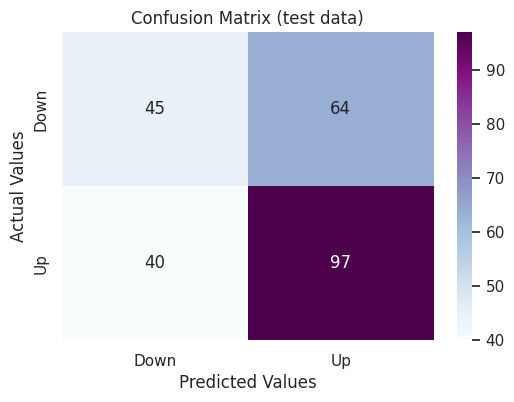

In [98]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
plt.title('Confusion Matrix (test data)')
sns.heatmap(cm , annot=True , fmt='d', cmap='BuPu')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('confusion_matrix(test data).png')
plt.xticks([0.5,1.5], ['Down','Up'])
plt.yticks([0.5,1.5], ['Down' ,'Up'])


**Since the number of errors is high, it indicates that our model is not performing effectively.**

In [99]:
#Accuracy from confusion matrix
TP= cm[1,1] #True positive
TN= cm[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.5772357723577236


In [100]:
# Calculate accuracy(Accuracy)
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

# Calculate positive precision(Precision)
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Calculate negative accuracy(Recall)
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.5772357723577236
Precision: 0.6024844720496895
Recall: 0.708029197080292


## Confusion matrix metrics

**We can also provide a more comprehensive report of the model's performance using another method by utilizing the `classification_report` function from the sklearn.metrics library.**

In [102]:
#Import the metrics class

print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision: ", metrics.precision_score(y_test, y_test_pred, pos_label='Up'))
print("Recall: ", metrics.recall_score(y_test, y_test_pred, pos_label='Up'))

target_names = ['Up', 'Down']
print(classification_report(y_test, y_test_pred,target_names=target_names))

Accuracy:  0.5772357723577236
Precision:  0.6024844720496895
Recall:  0.708029197080292
              precision    recall  f1-score   support

          Up       0.53      0.41      0.46       109
        Down       0.60      0.71      0.65       137

    accuracy                           0.58       246
   macro avg       0.57      0.56      0.56       246
weighted avg       0.57      0.58      0.57       246



# Step 3: Logestic Regression with more variable

In this logistic regression model, considering the predictor variables `(Lag1, Lag2, Lag3, Lag4, Lag5, Volume)` and the response variable `(Direction)`, we can write the following formula for the logistic regression model:

$$ log(odds(Direction)) = \beta_0 + \beta_1 Lag1 + \beta_2 Lag2 + \beta_3 Lag3 + \beta_4 Lag4 + \beta_5 Lag5 + \beta_6 Volume  $$

Here, `β0, β1, β2, β3, β4, β5, and β6` are the coefficients or parameters of the Logistic Regression model, estimated through methods such as Maximum Likelihood Estimation (MLE) or other estimation techniques during model training. This formula can be used to predict the probability of the Direction outcome for a new dataset.

In [104]:
X_train = data_train.loc[: , 'Lag1' : 'Today']
Y_train = data_train["Direction"]

In [105]:
X_test = data_test.loc[: , 'Lag1' : 'Today']
Y_test = data_test["Direction"]

In [106]:
X_train

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
723,0.433,0.172,1.623,0.158,-0.843,1.09770,-0.024
1029,0.330,0.070,0.693,0.421,-0.858,1.52708,0.018
831,0.184,0.920,-0.592,-0.759,-1.379,1.66210,0.177
598,0.354,1.469,-0.376,0.183,1.957,1.66250,0.472
1112,0.222,0.257,0.226,-0.235,0.524,1.84044,0.363
...,...,...,...,...,...,...,...
1067,0.555,0.001,-0.834,0.597,0.227,1.97983,-1.176
1118,-1.083,0.022,-0.205,-0.071,0.495,2.02992,-0.763
1153,-0.599,0.706,-0.183,0.674,-0.268,1.70930,0.283
883,0.706,-0.044,-0.479,-0.430,-0.329,1.44580,-1.334


In [107]:
model2_classifier = LogisticRegression()
model2_classifier.fit(X_train,Y_train)

LogisticRegression()

In [108]:
r_sq = model2_classifier.score(X_train , Y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9949031600407747


In [109]:
#Predicting train and test set result
Y_train_pred = model2_classifier.predict(X_train)
Y_test_pred = model2_classifier.predict(X_test)

In [110]:
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Logistic Regression model in train accuracy (in %) is {train_accuracy*100} and Train Error of logestic model is {1 - train_accuracy}",)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Logistic Regression model in test accuracy (in %) is {test_accuracy*100} and Test Error of logestic model is {1 - test_accuracy}")

Logistic Regression model in train accuracy (in %) is 99.49031600407747 and Train Error of logestic model is 0.0050968399592252744
Logistic Regression model in test accuracy (in %) is 99.59349593495935 and Test Error of logestic model is 0.004065040650406471


**Our second model has both high training accuracy and high test accuracy, indicating that our model has performed well and can be considered a good model.**

##  Evaluate the model using a confusion matrix

([<matplotlib.axis.YTick at 0x78c80c4b3640>,
 [Text(0, 0.5, 'Down'), Text(0, 1.5, 'Up')])

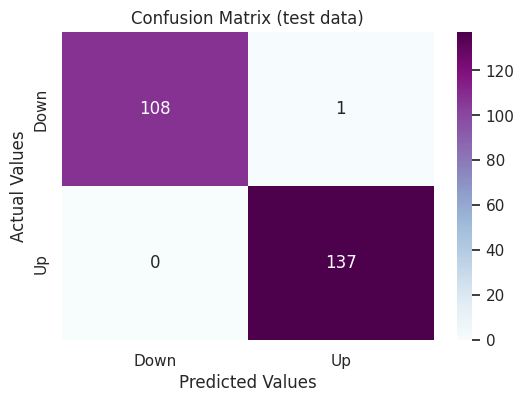

In [111]:
cm = confusion_matrix(Y_test, Y_test_pred)

plt.figure(figsize=(6,4))
plt.title('Confusion Matrix (test data)')
sns.heatmap(cm , annot=True , fmt='d', cmap='BuPu')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('confusion_matrix(test data).png')
plt.xticks([0.5,1.5], ['Down','Up'])
plt.yticks([0.5,1.5], ['Down' ,'Up'])

**The error count has been very low, with only one mistake among all the data we had, and the rest were classified correctly. It seems like a good model.**

In [112]:
# Calculate accuracy(Accuracy)
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

# Calculate positive precision(Precision)
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Calculate negative accuracy(Recall)
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9959349593495935
Precision: 0.9927536231884058
Recall: 1.0


## Confusion matrix metrics

In [113]:
target_names = ['Up', 'Down']
print(classification_report(Y_test, Y_test_pred,target_names=target_names))

              precision    recall  f1-score   support

          Up       1.00      0.99      1.00       109
        Down       0.99      1.00      1.00       137

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



**As evident from the results, the second model performs significantly better, achieving a classification accuracy of 99%. This is excellent!** 

**If you found this notebook helpful, please don't forget to <span style='color:#0BCD94'> Upvote </span> and <span style='color:#0BCD94'>Follow </span> me. Thank you.**